<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Проверим,-какие-признаки-нуждаются-в-прямом-кодировании-и-в-масштабировании." data-toc-modified-id="Проверим,-какие-признаки-нуждаются-в-прямом-кодировании-и-в-масштабировании.-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Проверим, какие признаки нуждаются в прямом кодировании и в масштабировании.</a></span></li></ul></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Чтобы-устранить-дисбаланс-применяем-метод-class_weight='balanced'" data-toc-modified-id="Чтобы-устранить-дисбаланс-применяем-метод-class_weight='balanced'-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Чтобы устранить дисбаланс применяем метод class_weight='balanced'</a></span></li><li><span><a href="#Масштабирование" data-toc-modified-id="Масштабирование-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Масштабирование</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

`Описание проекта:` 
В данном пректе мы проведём исследование имеющее своей целью предсказать отток клиентов банка и спрогнозировать - потеряет ли банк клиента или нет.

## Подготовка данных

Импортируем библиотеки

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score

Импорт датасета

In [3]:
# импортируем дадасет
try:
    df = pd.read_csv('Churn.csv')
except:
    df = pd.read_csv('/datasets/Churn.csv')

Выведение основной информации датасета для ознакомления

Мы видим, что признак 'Tenure' (сколько лет человек является клиентом банка) имеет пропуски.
Пропуски, скорее всего, означают что объект является клиентом банка менее года, поэтому считаю целесообразным зменить припущенные значения на нули.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Посмотрим на объекты с пропущенными значениями в признаке 'Tenure'

In [5]:
df.loc[df['Tenure'].isna()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


In [6]:
# меняем пропущенные значения на нули
df.loc[:, 'Tenure'] = df.loc[:, 'Tenure'].fillna(0)

In [7]:
# проверяем что пропущенных значений не осталось
df['Tenure'].isna().sum()

0

In [8]:
# проверяем на наличие пропусков во всех параметрах
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
# посмотри на первые 10 строк
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


#### Проверим, какие признаки нуждаются в прямом кодировании и в масштабировании.

In [10]:
# смотрим типы признаков
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [11]:
# выбираем признаки нуждающиеся в прямом кодировании
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


`Вывод: подходящие признаки для прямого кодирования: 'Gender' и 'Geography'`

Перед тем как проводить прямое кодирование необходимо удалить неинформативные признаки. Для обучения модели не все параметры представляют ценность. Параметры не имеющие предсказательной ценности должны быть удалены

In [12]:
df = df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis = 1)

Я решил удалить вешеперечисленные признаки так как 'RowNumber' является порядковым номером объекта и не имеет предсказательой привязки к другим признакам. 'CustomerId' тоже евляется порядковым номером присуждаемом клиентам в порядке очереди, поетому он не оказывает влияния на предсказание модели. 'Surname' - фамилия, это строка, коротая не может быть использована для обучения, переводить фамилию в числовые признаки не имеет смысла тк это не окажет полезного/цунного влияния на предсказание модели. 

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Преобразуем категориальные признаки в числовые при помощи прямого кодирования

In [14]:
# кодируем признаки 'Gender'и 'Geography', используем drop_first=True чтобы избежать коллинеарности
df_ohe = pd.get_dummies(data=df, columns=['Gender', 'Geography'], drop_first=True)

# выводим первые 10 строк
df_ohe.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1
5,645,44,8.0,113755.78,2,1,0,149756.71,1,1,0,1
6,822,50,7.0,0.00,2,1,1,10062.80,0,1,0,0
7,376,29,4.0,115046.74,4,1,0,119346.88,1,0,1,0
8,501,44,4.0,142051.07,2,0,1,74940.50,0,1,0,0
9,684,27,2.0,134603.88,1,1,1,71725.73,0,1,0,0


`Вывод: Таблица преобразована`

## Исследование задачи

Проводим разделение выборки на обучающую 60%, валидационную и тестовую - каждая по 20%

In [15]:
train, valid_test = train_test_split(
    df_ohe, test_size=0.40, random_state=12345)

valid, test = train_test_split(
    valid_test, test_size=0.50, random_state=12345)

print('Выводим размер таблицы train: ', train.shape)
print('Выводим размер таблицы valid_test: ', valid_test.shape)
print('Выводим размер таблицы valid: ', valid.shape)
print('Выводим размер таблицы test: ', test.shape)

Выводим размер таблицы train:  (6000, 12)
Выводим размер таблицы valid_test:  (4000, 12)
Выводим размер таблицы valid:  (2000, 12)
Выводим размер таблицы test:  (2000, 12)


Проверяем необходимость масштабирования признаков

In [16]:
# проверяем признаки на разброс значений между минимальными и максимальными значениями
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

for i in df_ohe[numeric]:
    print(i, 'MAX', df_ohe[i].max())
    print(i, 'MIN', df_ohe[i].min())
    print()

CreditScore MAX 850
CreditScore MIN 350

Age MAX 92
Age MIN 18

Tenure MAX 10.0
Tenure MIN 0.0

Balance MAX 250898.09
Balance MIN 0.0

NumOfProducts MAX 4
NumOfProducts MIN 1

EstimatedSalary MAX 199992.48
EstimatedSalary MIN 11.58



Проводим масштабирование чтобы стандартизировать значения для лучшей обучаемости модели

In [17]:
pd.options.mode.chained_assignment = None

scaler = StandardScaler()
scaler.fit(train[numeric])

train[numeric] = scaler.transform(train[numeric])
valid[numeric] = scaler.transform(valid[numeric])
test[numeric] = scaler.transform(test[numeric])

`Вывод: мы перевели категориальные строчные признаки в числовые для удобства обучения модели, проверили данные на предмет разброса значений признаков и провели масштабирование.`

Разделяем выборки

In [18]:
# делим выбоки на учебные, валидационные и тестовые

target_train = train['Exited']
features_train = train.drop(['Exited'], axis=1)
target_valid = valid['Exited']
features_valid = valid.drop(['Exited'], axis=1)
target_test = test['Exited']
features_test = test.drop(['Exited'], axis=1)

print('Выводим размер таблицы target_train: ', target_train.shape)
print('Выводим размер таблицы features_train: ', features_train.shape)
print('Выводим размер таблицы target_valid: ', target_valid.shape)
print('Выводим размер таблицы features_valid: ', features_valid.shape)
print('Выводим размер таблицы target_test: ', target_test.shape)
print('Выводим размер таблицы features_test: ', features_test.shape)


Выводим размер таблицы target_train:  (6000,)
Выводим размер таблицы features_train:  (6000, 11)
Выводим размер таблицы target_valid:  (2000,)
Выводим размер таблицы features_valid:  (2000, 11)
Выводим размер таблицы target_test:  (2000,)
Выводим размер таблицы features_test:  (2000, 11)


Проверяем разброс классов по признакам имеющих бинарное распределение

In [19]:
df_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1


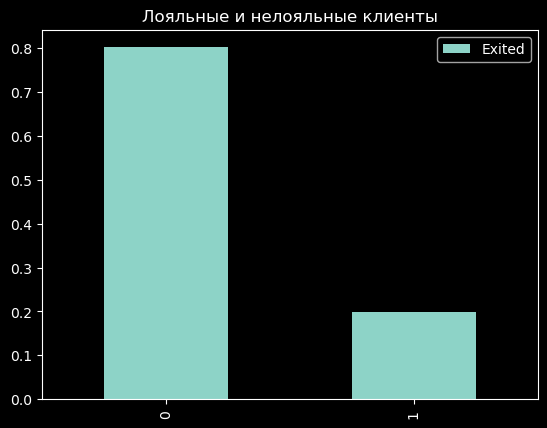

In [20]:
target_train.value_counts(normalize=True).plot(kind='bar', legend = True)
plt.title('Лояльные и нелояльные клиенты')
plt.show()

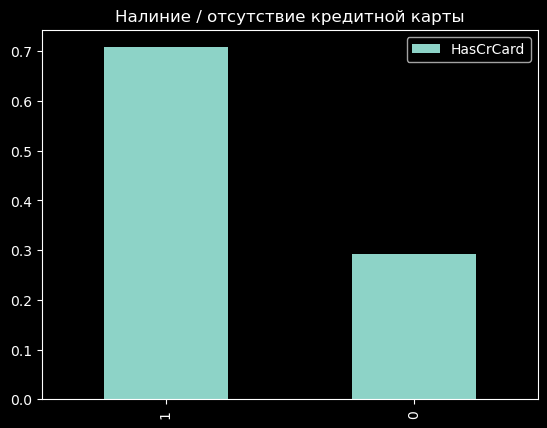

In [21]:
features_train['HasCrCard'].value_counts(normalize=True).plot(kind='bar', legend = True)
plt.title('Налиние / отсутствие кредитной карты')
plt.show()

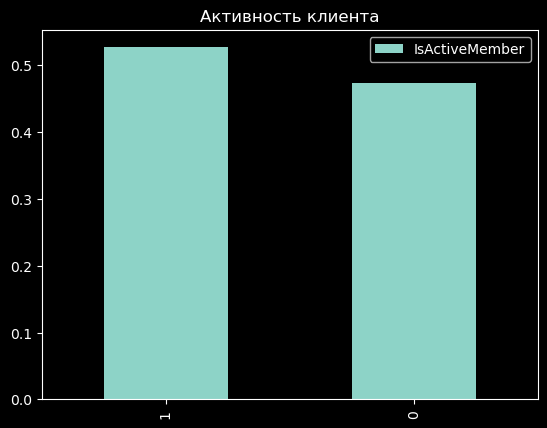

In [22]:
features_train['IsActiveMember'].value_counts(normalize=True).plot(kind='bar', legend = True)
plt.title('Активность клиента')
plt.show()

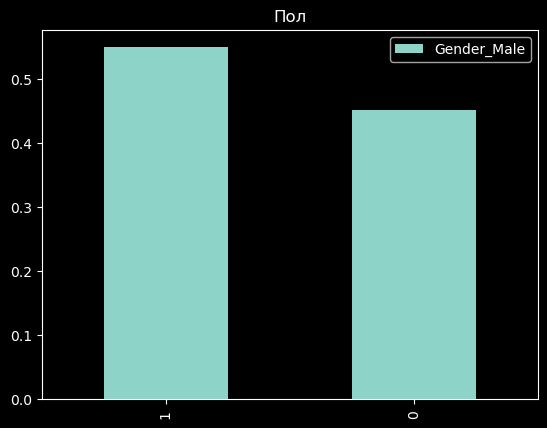

In [23]:
features_train['Gender_Male'].value_counts(normalize=True).plot(kind='bar', legend = True)
plt.title('Пол')
plt.show()

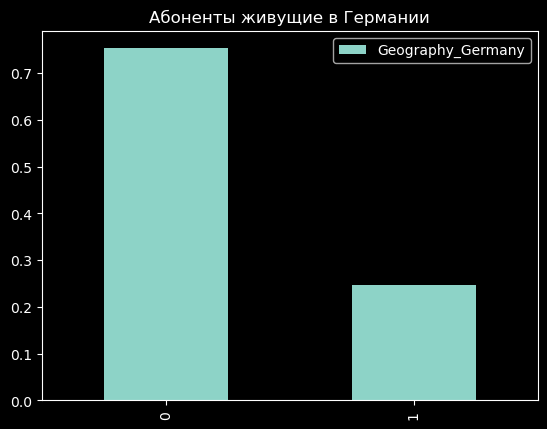

In [24]:
features_train['Geography_Germany'].value_counts(normalize=True).plot(kind='bar', legend = True)
plt.title('Абоненты живущие в Германии')
plt.show()

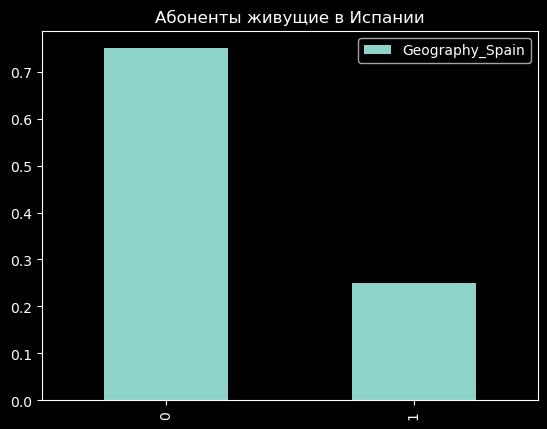

In [26]:
features_train['Geography_Spain'].value_counts(normalize=True).plot(kind='bar', legend = True)
plt.title('Абоненты живущие в Испании')
plt.show()

`Вывод: как мы видим, дисбаланс присутствует в большинстве бинарных признаков`

Начинаем обучать наши модели

Логистическая регрессия

Accuracy лучшей модели: 0.8025
F1-мера лучшей модели: 0.33389544688026984
AUC-ROC лучшей модели: 0.7587361404315294


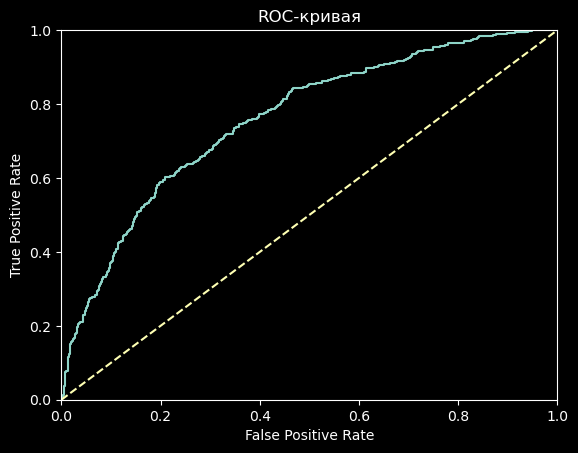

In [27]:
# создам переменную и записываем в неё модель логистической регрессии
# добавлением случайность для улучшения результата и максимальное кол-во итераций равное 2000
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=2000)

# обучаем модель на тренировочной выборке
model.fit(features_train, target_train)

# находим качество модели сравнивая результаты валидационой выборки и результаты предсказательной модели и находим F1-меру
# также находим долю правильных ответов (точность)
best_result_1 = model.score(features_valid, target_valid)
predicted_valid = model.predict(features_valid)

print(f'Accuracy лучшей модели: {best_result_1:.4}')
print("F1-мера лучшей модели:", f1_score(target_valid, predicted_valid))

# ROC кривая
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(f'AUC-ROC лучшей модели: {auc_roc}')

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()

# строим график
plt.plot(fpr, tpr)

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')

# применяем функции plt.xlim() и plt.ylim(), чтобы установить границы осей от 0 до 1
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

#  применяем функцию plt.xlabel() и plt.ylabel(), чтобы подписать оси "False Positive Rate" и "True Positive Rate"
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# добавляем к графику заголовок "ROC-кривая" функцией plt.title()
plt.title('ROC-кривая')
plt.show()

`Вывод: Как мы видим, ROC-кривая проходит выше случайной модели, это говорит о том что наша модель отличается от случайной и имеет большую предсказательную ценность, чем выше возвышается кривая над прямой, тем лучше наша модель. `

Дерево решений

Accuracy лучшей модели: 0.8475
F1-мера лучшей модели: 0.5746164574616458
Глубина дерева: 9
AUC-ROC лучшей модели: 0.7894116828676679


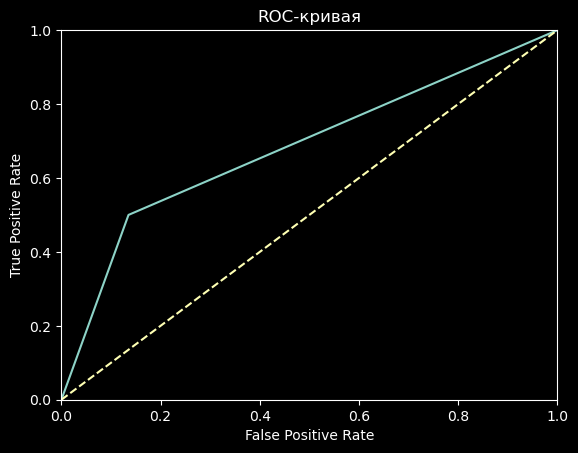

In [28]:
best_f1 = 0
best_auc_roc = 0
best_acc = 0
best_depth = 0

for depth in range(1, 100, 1):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid) 

    # F1-мера
    f1 = f1_score(target_valid, predicted_valid)

    # Точность (accuracy)
    accuracy_valid = accuracy_score(target_valid, predicted_valid)
    #print(f'Доля правильных отвтов (Accuracy) лучшей модели: {accuracy_valid}')

    # высчитываем AUC-ROC
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid =  probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

    if f1 > best_f1:
        best_f1 = f1
        best_auc_roc = auc_roc
        best_depth = depth
        best_acc = accuracy_valid

print(f'Accuracy лучшей модели: {best_acc}')
print(f'F1-мера лучшей модели: {best_f1}')
print(f'Глубина дерева: {best_depth}')
print(f'AUC-ROC лучшей модели: {best_auc_roc}')



# ROC graph
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()

# строим график
plt.plot(fpr, tpr)

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')

# применяем функции plt.xlim() и plt.ylim(), чтобы установить границы осей от 0 до 1
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

#  применяем функцию plt.xlabel() и plt.ylabel(), чтобы подписать оси "False Positive Rate" и "True Positive Rate"
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# добавляем к графику заголовок "ROC-кривая" функцией plt.title()
plt.title('ROC-кривая')
plt.show()



Случайный лес

Accuracy лучшей модели: 0.868
F1-мера равна: 0.6024096385542168
Глубина дерева: 12
Кол-во деревьев: 23
AUC-ROC лучшей модели: 0.8359300806319904


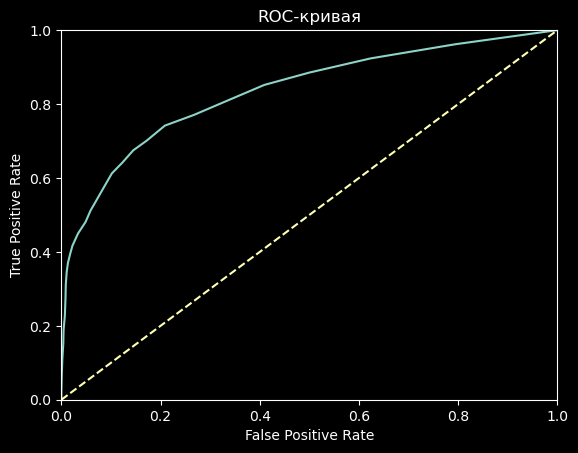

In [29]:

best_result = 0
best_est = 0
best_f1 = 0
best_auc_roc = 0
best_acc = 0
best_depth = 0

for depth in range(1, 30, 1):
    for n_est in range(1, 30, 1):
        model = RandomForestClassifier(n_estimators=n_est, max_depth=depth, random_state=12345)
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        # высчитываем f1
        f1 = f1_score(target_valid, predicted_valid)

        # высчитываем AUC-ROC
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid =  probabilities_valid[:, 1]
        auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

        # высчитываем Accuracy
        result = model.score(features_valid, target_valid)
        
        if f1 > best_f1:
            best_f1 = f1
            best_auc_roc = auc_roc
            best_result = result
            best_est = n_est
            best_depth = depth
            
print(f'Accuracy лучшей модели: {best_result}')
print(f'F1-мера равна: {best_f1}')
print(f'Глубина дерева: {best_depth}')
print(f'Кол-во деревьев: {best_est}')
print(f'AUC-ROC лучшей модели: {best_auc_roc}')


# ROC graph
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()

# строим график
plt.plot(fpr, tpr)

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')

# применяем функции plt.xlim() и plt.ylim(), чтобы установить границы осей от 0 до 1
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

#  применяем функцию plt.xlabel() и plt.ylabel(), чтобы подписать оси "False Positive Rate" и "True Positive Rate"
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# добавляем к графику заголовок "ROC-кривая" функцией plt.title()
plt.title('ROC-кривая')
plt.show()

`Выводы: было проведено исследование трех моделей с несбалансированной выборкой - логистическая регрессия, дерево решений и случайный лес.`

`Самую лучшую метрику показала модель случайнонго леса со следующими метриками:`

- Accuracy лучшей модели: 0.868
- F1-мера равна: 0.6024096385542168
- Глубина дерева: 12
- Кол-во деревьев: 23
- AUC-ROC лучшей модели: 0.8359300806319904

## Борьба с дисбалансом

### Чтобы устранить дисбаланс применяем метод class_weight='balanced'

Логистическая регрессия - сбалансированная выбока

Accuracy лучшей модели: 0.8025
F1-мера лучшей модели: 0.5775862068965518
auc_roc, 0.8333040969277579


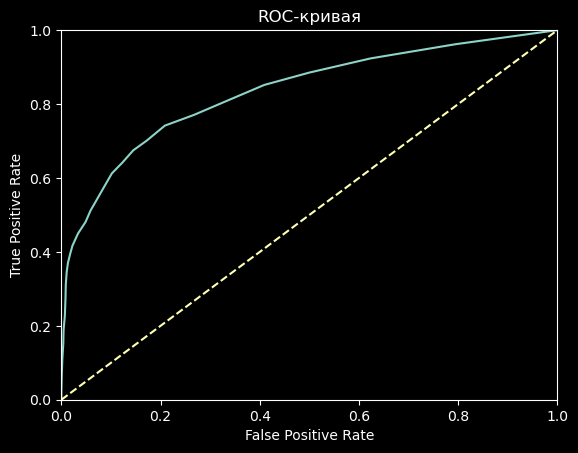

In [30]:
# создам переменную и записываем в неё модель логистической регрессии
# добавлением случайность для улучшения результата и максимальное кол-во итераций равное 2000
model_balanced = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=2000, class_weight='balanced')

# обучаем модель на тренировочной выборке
model_balanced.fit(features_train, target_train)

# находим качество модели сравнивая результаты валидационой выборки и результаты предсказательной модели и находим F1-меру
# также находим долю правильных ответов (точность)
best_result_balanced = model_balanced.score(features_valid, target_valid)
predicted_valid_balanced = model_balanced.predict(features_valid)

print(f'Accuracy лучшей модели: {best_result_1:.4}')
print("F1-мера лучшей модели:", f1_score(target_valid, predicted_valid))

# ROC кривая
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc_lr_balanced = roc_auc_score(target_valid, probabilities_one_valid)
print(f'auc_roc, {auc_roc_lr_balanced}')


fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()

# строим график
plt.plot(fpr, tpr)

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')

# применяем функции plt.xlim() и plt.ylim(), чтобы установить границы осей от 0 до 1
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

#  применяем функцию plt.xlabel() и plt.ylabel(), чтобы подписать оси "False Positive Rate" и "True Positive Rate"
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# добавляем к графику заголовок "ROC-кривая" функцией plt.title()
plt.title('ROC-кривая')
plt.show()

Дерево решений - сбалансировання выборка

Accuracy лучшей модели: 0.8105
F1-мера лучшей модели: 0.5963791267305644
Глубина дерева: 5
AUC-ROC лучшей модели: 0.8310244134068074


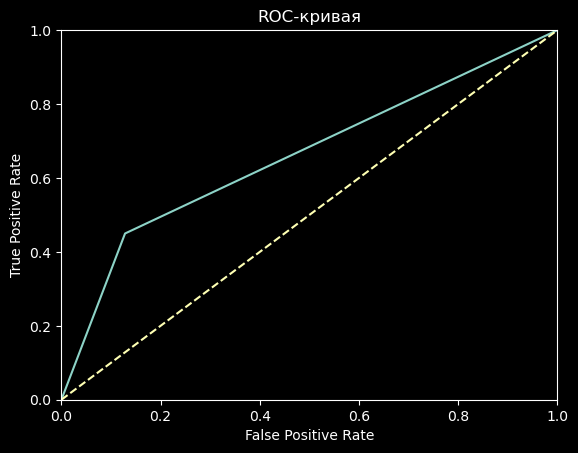

In [31]:
best_f1 = 0
best_auc_roc = 0
best_acc = 0
best_depth = 0

for depth in range(1, 100, 1):
    model_balanced2 = DecisionTreeClassifier(max_depth=depth, random_state=12345, class_weight='balanced')
    model_balanced2.fit(features_train, target_train)
    predicted_valid = model_balanced2.predict(features_valid) 

    # F1-мера
    f1 = f1_score(target_valid, predicted_valid)

    # Точность (accuracy)
    accuracy_valid = accuracy_score(target_valid, predicted_valid)
    #print(f'Доля правильных отвтов (Accuracy) лучшей модели: {accuracy_valid}')

    # высчитываем AUC-ROC
    probabilities_valid = model_balanced2.predict_proba(features_valid)
    probabilities_one_valid =  probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

    if f1 > best_f1:
        best_f1 = f1
        best_auc_roc = auc_roc
        best_depth = depth
        best_acc = accuracy_valid

print(f'Accuracy лучшей модели: {best_acc}')
print(f'F1-мера лучшей модели: {best_f1}')
print(f'Глубина дерева: {best_depth}')
print(f'AUC-ROC лучшей модели: {best_auc_roc}')



# ROC graph
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()

# строим график
plt.plot(fpr, tpr)

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')

# применяем функции plt.xlim() и plt.ylim(), чтобы установить границы осей от 0 до 1
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

#  применяем функцию plt.xlabel() и plt.ylabel(), чтобы подписать оси "False Positive Rate" и "True Positive Rate"
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# добавляем к графику заголовок "ROC-кривая" функцией plt.title()
plt.title('ROC-кривая')
plt.show()

Случайный лес - сбалансированная выборка

Accuracy лучшей модели: 0.843
F1-мера равна: 0.639080459770115
Глубина дерева: 9
Кол-во деревьев: 40
AUC-ROC лучшей модели: 0.8484414979524434


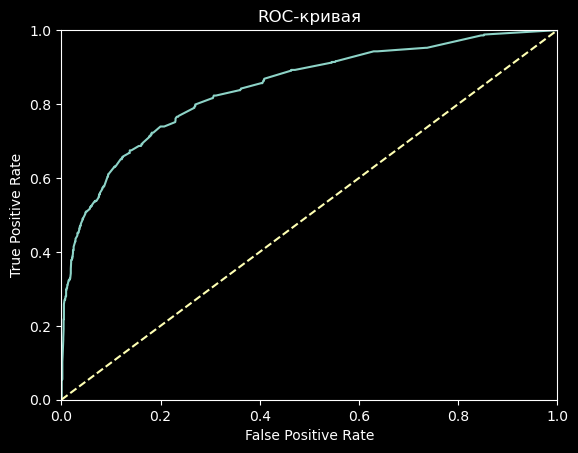

In [32]:
best_result = 0
best_est = 0
best_f1 = 0
best_auc_roc = 0
best_acc = 0
best_depth = 0

for depth in range(1, 20, 1):
    for n_est in range(1, 50, 1):
        model_balanced3 = RandomForestClassifier(n_estimators=n_est, max_depth=depth, random_state=12345, class_weight='balanced')
        model_balanced3.fit(features_train, target_train)
        predicted_valid = model_balanced3.predict(features_valid)
        # высчитываем f1
        f1 = f1_score(target_valid, predicted_valid)

        # высчитываем AUC-ROC
        probabilities_valid = model_balanced3.predict_proba(features_valid)
        probabilities_one_valid =  probabilities_valid[:, 1]
        auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

        # высчитываем Accuracy
        result = model_balanced3.score(features_valid, target_valid)
        
        if f1 > best_f1:
            best_f1 = f1
            best_auc_roc = auc_roc
            best_result = result
            best_est = n_est
            best_depth = depth
print(f'Accuracy лучшей модели: {best_result}')
print(f'F1-мера равна: {best_f1}')
print(f'Глубина дерева: {best_depth}')
print(f'Кол-во деревьев: {best_est}')
print(f'AUC-ROC лучшей модели: {best_auc_roc}')


# ROC graph
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()

# строим график
plt.plot(fpr, tpr)

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')

# применяем функции plt.xlim() и plt.ylim(), чтобы установить границы осей от 0 до 1
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

#  применяем функцию plt.xlabel() и plt.ylabel(), чтобы подписать оси "False Positive Rate" и "True Positive Rate"
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# добавляем к графику заголовок "ROC-кривая" функцией plt.title()
plt.title('ROC-кривая')
plt.show()

`Вывод: модель случайный лес с пераметром class_weight='balanced' показал лучшую метрику`

- Accuracy лучшей модели: 0.843
- F1-мера равна: 0.639080459770115
- Глубина дерева: 9
- Кол-во деревьев: 40
- AUC-ROC лучшей модели: 0.8484414979524434

### Масштабирование

Теперь переходим к мастшабированию бинарных дисбалансных признаков

In [33]:
features_0_count = features_train[target_train == 0]
features_1_count = features_train[target_train == 1]
target_0_count = target_train[target_train == 0]
target_1_count = target_train[target_train == 1]

print(features_0_count.shape)
print(features_1_count.shape)
print(target_0_count.shape)
print(target_1_count.shape)

(4804, 11)
(1196, 11)
(4804,)
(1196,)


Увеличиваем диспалансные выборки с помощию upsample

In [34]:
# коэффицент 
repeat = 4

# объедняем таблицы
features_upsampled = pd.concat([features_0_count] + [features_1_count] * repeat)
target_upsampled = pd.concat([target_0_count] + [target_1_count] * repeat)
# смешиваем выборки 
features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)

print(features_upsampled.shape)
print(target_upsampled.shape)

(9588, 11)
(9588,)


Проверяем сбалансированность бинарной целевой выборки после масштабирования

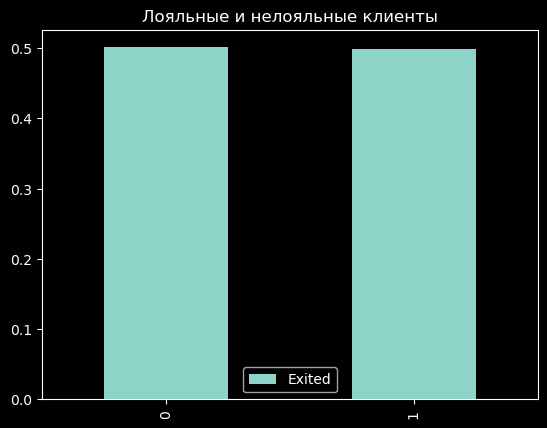

In [36]:
target_upsampled.value_counts(normalize=True).plot(kind='bar', legend = True)
plt.title('Лояльные и нелояльные клиенты')
plt.show()

Проводим обучение моделей на увеличеной выбоке методом upsampling

Логистическая регрессия на увелиненой выборке (upsampling)

Accuracy лучшей модели: 0.701
F1-мера лучшей модели: 0.4888888888888888
AUC-ROC лучшей модели: 0.7634331202100183


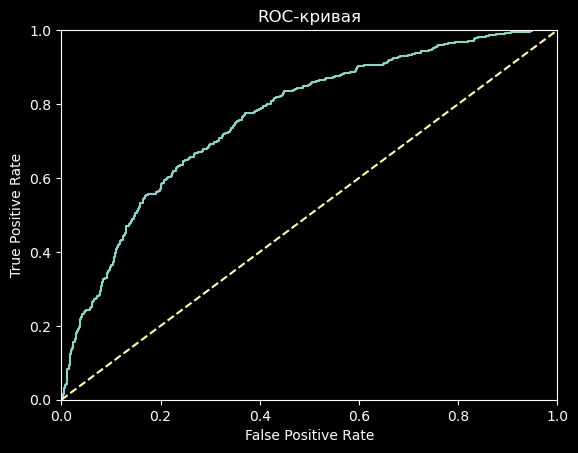

In [38]:
# создам переменную и записываем в неё модель логистической регрессии
# добавляем случайность для улучшения результата и максимальное кол-во итераций равное 2000
model_up_log = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=2000)

# обучаем модель на тренировочной выборке
model_up_log.fit(features_upsampled, target_upsampled)

# находим качество модели сравнивая результаты валидационой выборки и результаты предсказательной модели и находим F1-меру
# также находим долю правильных ответов (точность)
best_result_1 = model_up_log.score(features_valid, target_valid)
predicted_valid = model_up_log.predict(features_valid)

print(f'Accuracy лучшей модели: {best_result_1:.4}')
print("F1-мера лучшей модели:", f1_score(target_valid, predicted_valid))

# ROC кривая
probabilities_valid = model_up_log.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

# вычисляем AUC-ROC
auc_roc_lg_up = roc_auc_score(target_valid, probabilities_one_valid)
print(f'AUC-ROC лучшей модели: {auc_roc_lg_up}')


fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()

# строим график
plt.plot(fpr, tpr)

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')

# применяем функции plt.xlim() и plt.ylim(), чтобы установить границы осей от 0 до 1
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

#  применяем функцию plt.xlabel() и plt.ylabel(), чтобы подписать оси "False Positive Rate" и "True Positive Rate"
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# добавляем к графику заголовок "ROC-кривая" функцией plt.title()
plt.title('ROC-кривая')
plt.show()

Дерево решений на увелиненой выборке (upsampling)

Accuracy лучшей модели: 0.8105
F1-мера лучшей модели: 0.5963791267305644
Глубина дерева: 5
AUC-ROC лучшей модели: 0.8310244134068074


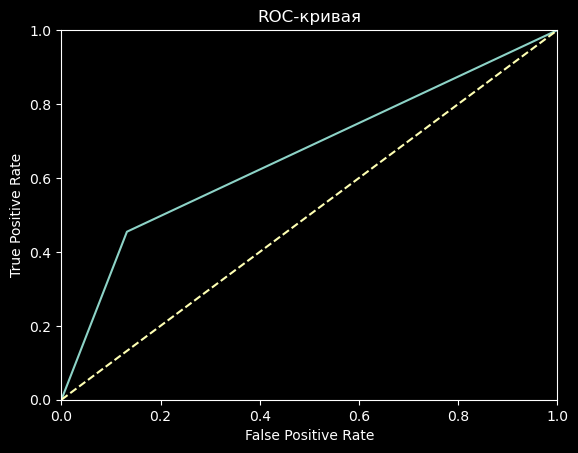

In [39]:
best_f1 = 0
best_auc_roc = 0
best_acc = 0
best_depth = 0

for depth in range(1, 100, 1):
    model_up_tree = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model_up_tree.fit(features_upsampled, target_upsampled)
    predicted_valid_up = model_up_tree.predict(features_valid) 

    # F1-мера
    f1 = f1_score(target_valid, predicted_valid_up)

    # Точность (accuracy)
    accuracy_valid = accuracy_score(target_valid, predicted_valid_up)
    
    # высчитываем AUC-ROC
    probabilities_valid = model_up_tree.predict_proba(features_valid)
    probabilities_one_valid =  probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

    if f1 > best_f1:
        best_f1 = f1
        best_auc_roc = auc_roc
        best_depth = depth
        best_acc = accuracy_valid

print(f'Accuracy лучшей модели: {best_acc}')
print(f'F1-мера лучшей модели: {best_f1}')
print(f'Глубина дерева: {best_depth}')
print(f'AUC-ROC лучшей модели: {best_auc_roc}')



# ROC graph
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()

# строим график
plt.plot(fpr, tpr)

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')

# применяем функции plt.xlim() и plt.ylim(), чтобы установить границы осей от 0 до 1
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

#  применяем функцию plt.xlabel() и plt.ylabel(), чтобы подписать оси "False Positive Rate" и "True Positive Rate"
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# добавляем к графику заголовок "ROC-кривая" функцией plt.title()
plt.title('ROC-кривая')
plt.show()

Случайный лес на увелиненой выборке (upsampling)

Accuracy лучшей модели: 0.828
F1-мера равна: 0.6293103448275862
Глубина дерева: 9
Кол-во деревьев: 38
AUC-ROC лучшей модели: 0.8510939456444813


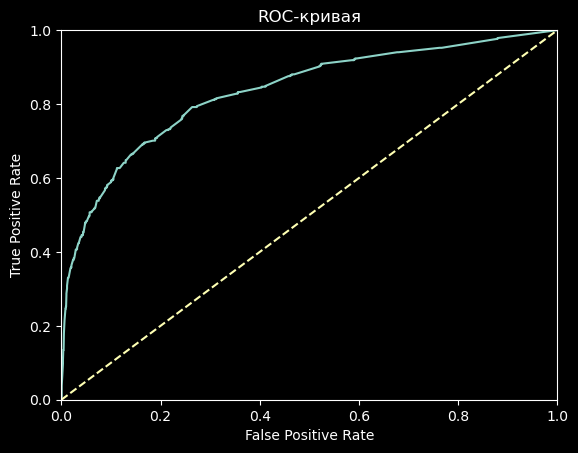

In [40]:
best_result = 0
best_est = 0
best_f1 = 0
best_auc_roc = 0
best_acc = 0
best_depth = 0

for depth in range(1, 20, 1):
    for n_est in range(1, 40, 1):
        model_up_randfor = RandomForestClassifier(n_estimators=n_est, max_depth=depth, random_state=12345)
        model_up_randfor.fit(features_upsampled, target_upsampled)
        predicted_valid = model_up_randfor.predict(features_valid)

        # высчитываем f1
        f1 = f1_score(target_valid, predicted_valid)

        # высчитываем AUC-ROC
        probabilities_valid = model_up_randfor.predict_proba(features_valid)
        probabilities_one_valid =  probabilities_valid[:, 1]
        auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

        # высчитываем Accuracy
        result = model_up_randfor.score(features_valid, target_valid)
        
        if f1 > best_f1:
            best_f1 = f1
            best_auc_roc = auc_roc
            best_result = result
            best_est = n_est
            best_depth = depth
print(f'Accuracy лучшей модели: {best_result}')
print(f'F1-мера равна: {best_f1}')
print(f'Глубина дерева: {best_depth}')
print(f'Кол-во деревьев: {best_est}')
print(f'AUC-ROC лучшей модели: {best_auc_roc}')


# ROC graph
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()

# строим график
plt.plot(fpr, tpr)

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')

# применяем функции plt.xlim() и plt.ylim(), чтобы установить границы осей от 0 до 1
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

#  применяем функцию plt.xlabel() и plt.ylabel(), чтобы подписать оси "False Positive Rate" и "True Positive Rate"
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# добавляем к графику заголовок "ROC-кривая" функцией plt.title()
plt.title('ROC-кривая')
plt.show()

`Вывод: самой лучшей моделью на увеличеной выбоке сябя показал случайный лес с увеличой выборкой (upsampling) с глубиной дерева - 9, количеством деревбев - 38, а также параметром random_state=12345`

- F1-мера равна: 0.6293103448275862
- Глубина дерева: 9
- Кол-во деревьев: 38
- AUC-ROC лучшей модели: 0.8510939456444813

## Тестирование модели

Для достижения лучшей полноты обучаемости, увеличим обучающую выборку объеденив тренировачную и валидационную выборки

In [41]:
# создаём функцию принимающую как параметры нецелевую и целевую выборки и коеффицент повышения выборки.
def upsample(features, target, repeat):
    features_0_count = features[target == 0]
    features_1_count = features[target == 1]
    target_0_count = target[target == 0]
    target_1_count = target[target == 1]

    # масштабируем нулевые значения с ненулевыми, умноженными на коэффицент для балансировки
    features_upsampled = pd.concat([features_0_count] + [features_1_count] * repeat)
    target_upsampled = pd.concat([target_0_count] + [target_1_count] * repeat)
    
    # перемешиваем выборки
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    # возвращаем сбалансированные и перемешанные выборки
    return features_upsampled, target_upsampled

# соединяем нецелевую и целевую выбоки
features_full_train = pd.concat([features_train, features_valid])
target_full_train = pd.concat([target_train, target_valid])

# применяем функцию для объединённых выборок
features_upsampled, target_upsampled = upsample(features_full_train, target_full_train, 4)

Случайный лес с обучением на объединённой выборке

Обучаем модель Случайного Дерева, которая показала себя лучше всего на масштабированной объединённой выборке (upsampled)

Проводим обучение на тестовой моделе со следующими параметрами:

- глубина дерева: 9
- количество деревьев: 38
- random_state=12345

Accuracy лучшей модели: 0.822
F1-мера равна: 0.6212765957446809
Глубина дерева: 9
Кол-во деревьев: 38
AUC-ROC лучшей модели: 0.8584453528934701


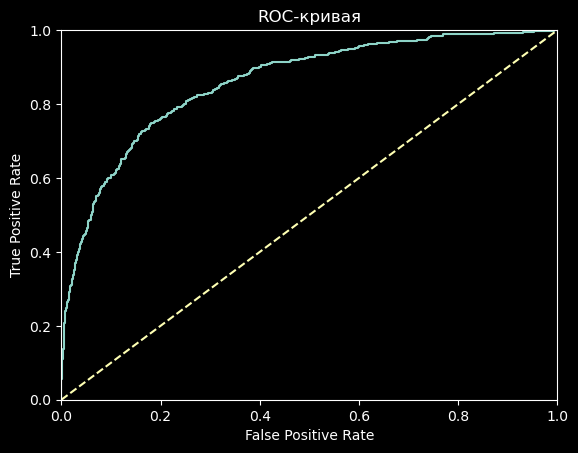

In [42]:
# сохраняем модель в переменной
model_up_randfor = RandomForestClassifier(n_estimators=38, max_depth=9, random_state=12345)

# обучаем на объединённой выборке
model_up_randfor.fit(features_upsampled, target_upsampled)

# предсказываем на тесмтовой выборке
predicted_test_up = model_up_randfor.predict(features_test)

# высчитываем f1
f1 = f1_score(target_test, predicted_test_up)

# высчитываем AUC-ROC
probabilities_test = model_up_randfor.predict_proba(features_test)
probabilities_one_test =  probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)

# высчитываем Accuracy
result = model_up_randfor.score(features_test, target_test)
        
# выводим метрики на экран
print(f'Accuracy лучшей модели: {result}')
print(f'F1-мера равна: {f1}')
print(f'Глубина дерева: {9}')
print(f'Кол-во деревьев: {38}')
print(f'AUC-ROC лучшей модели: {auc_roc}')


# ROC graph
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()

# строим график
plt.plot(fpr, tpr)

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')

# применяем функции plt.xlim() и plt.ylim(), чтобы установить границы осей от 0 до 1
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

#  применяем функцию plt.xlabel() и plt.ylabel(), чтобы подписать оси "False Positive Rate" и "True Positive Rate"
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# добавляем к графику заголовок "ROC-кривая" функцией plt.title()
plt.title('ROC-кривая')
plt.show()

`Вывод: модель случайный лес на масштабированной объединённой выборке (upsampled) показала следующие метрики`

- Accuracy лучшей модели: 0.822
- F1-мера равна: 0.6212765957446809
- Глубина дерева: 9
- Кол-во деревьев: 38
- AUC-ROC лучшей модели: 0.8584453528934701

**`Общий вывод исследования:`**

Целью данного исследования было предсказать отток клиентов банка при помощи различных методов машинного обучения. В процессе иследования оттока клиентов мы применили три модели машинного обучения чтобы ответить на вопрос - какая модель лучше предскажет уход клиента банка:

- Логистическая регрессия
- Дерево решений
- Случайный лес

Вышеперечисленные модели обучалиль при помощи несбалансированной и сбалансированной выборки чтобы найти оптимальную модель с наилучшим показателем F1-меры.

В результате проведёного исследования, мы пришли к выводу, что наиболее высокой проедсказательной способностью обладает модель Случайный лес на масштабированной объединённой выборке (upsampled) со следующими показателями:

- Accuracy лучшей модели: 0.8295
- F1-мера равна: 0.624862486248625
- Глубина дерева: 11
- Кол-во деревьев: 20
- AUC-ROC лучшей модели: 0.8525973996770959

Данная модель показала самую лучшую способность предсказывать отток клиентов банка по сравнению с вышеперечисленными моделями. 


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*